# 1. Import dependents

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
from perceptron import Perceptron

# 2. Load data and preprocessing data

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
print(df.isna().sum())
print(df.isnull().sum())

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [4]:
def day_of_year(date_str, date_format="%Y-%m-%d"):
    date_str = date_str.split(' ')[0]
    date_obj = datetime.strptime(date_str, date_format)
    return date_obj.timetuple().tm_yday

df['Formatted Date'] = df['Formatted Date'].apply(day_of_year)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,91,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,91,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,91,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,91,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,91,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df = df.groupby('Formatted Date', as_index=False)['Temperature (C)'].mean()
df['Formatted Date'] = df['Formatted Date'] / 366

In [6]:
X = df['Formatted Date'].values
Y = df['Temperature (C)'].values

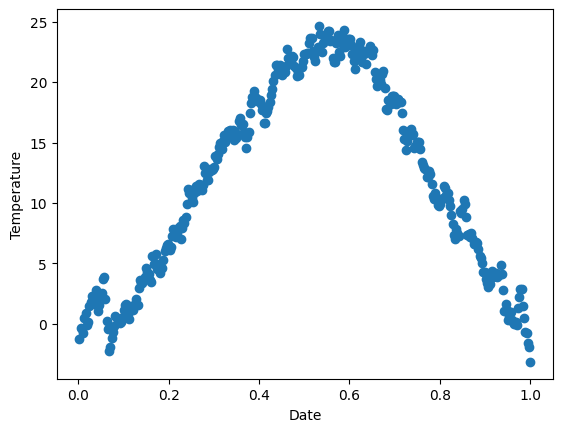

In [7]:
plt.scatter(X, Y)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# 3. Train, Test split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=.25, random_state=42)

x_train = x_train.reshape(-1, 1)
x_validation = x_validation.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print(f'x_train: {len(x_train)}, y_train: {len(y_train)}')
print(f'x_validation: {len(x_validation)}, y_validation: {len(y_validation)}')
print(f'x_test: {len(x_test)}, y_test: {len(y_test)}')

x_train: 292, y_train: 292
x_validation: 19, y_validation: 19
x_test: 55, y_test: 55


# 4. Initial, train and evaluate model

In [9]:
model = Perceptron(
    learning_rate=.0001,
    epochs=50,
    num_features=1,
)

In [10]:
model.train(x_train, y_train, x_validation, y_validation)

Epoch: 1
Train Loss: 11.510417918504254, Train Accuracy: 0.0
Validation Loss: 9.584671122882595, Validation Accuracy: 0
Epoch: 2
Train Loss: 11.16841217338672, Train Accuracy: 0.0
Validation Loss: 9.341632152741335, Validation Accuracy: 0
Epoch: 3
Train Loss: 10.846897364325486, Train Accuracy: 0.0
Validation Loss: 9.131437034723334, Validation Accuracy: 0
Epoch: 4
Train Loss: 10.54948915686356, Train Accuracy: 0.0
Validation Loss: 8.940122186783412, Validation Accuracy: 0
Epoch: 5
Train Loss: 10.279323395216604, Train Accuracy: 0.0
Validation Loss: 8.763130390008612, Validation Accuracy: 0
Epoch: 6
Train Loss: 10.024945034614753, Train Accuracy: 0.0
Validation Loss: 8.610111334134915, Validation Accuracy: 0
Epoch: 7
Train Loss: 9.790759575164987, Train Accuracy: 0.0
Validation Loss: 8.486007705736958, Validation Accuracy: 0
Epoch: 8
Train Loss: 9.584012641171423, Train Accuracy: 0.0
Validation Loss: 8.383500816956516, Validation Accuracy: 0
Epoch: 9
Train Loss: 9.394068387197851, Trai

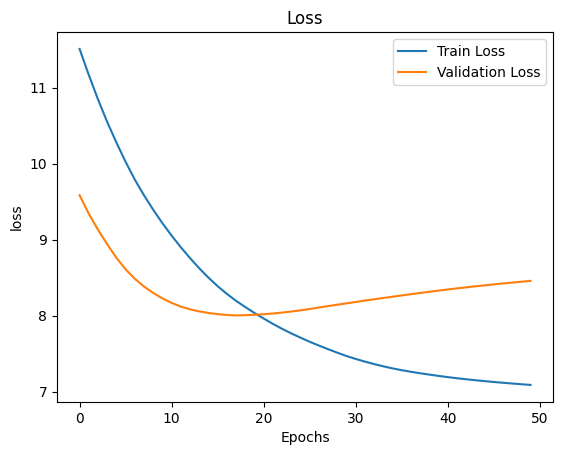

In [11]:
plt.plot(model.train_losses, label='Train Loss')
plt.plot(model.validation_losses, label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

In [12]:
loss, _ = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

Test Loss: 7.156560791396904


In [13]:
model.save('model')